<a href="https://colab.research.google.com/github/Kishore2681999/Aerofit-Business-Case-Study/blob/main/AerofitBusinessCaseStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#                                              Aerofit Business Case Study

1. Import the dataset and do usual data analysis steps like checking the structure &
characteristics of the dataset

In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/aerofit_treadmill.csv')


a) The data type of all columns in the “customers” table.

In [30]:
# Display the data types of all columns
print("Data types of all columns in the 'customers' table:")
print(df.dtypes)

Data types of all columns in the 'customers' table:
Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object


b) You can find the number of rows and columns given in the dataset

In [6]:
# Find the shape of the dataset
print("Shape of the dataset:", df.shape)


Shape of the dataset: (180, 9)


c) Check for the missing values and find the number of missing values in each
column

In [7]:
# Check for missing values
print("Missing values in each column:\n", df.isnull().sum())


Missing values in each column:
 Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64


2. Detect Outliers

 a) Find the outliers for every continuous variable in the dataset

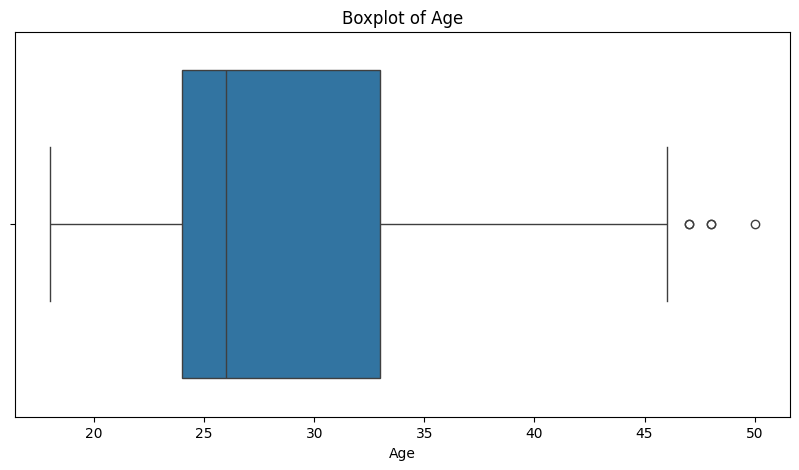

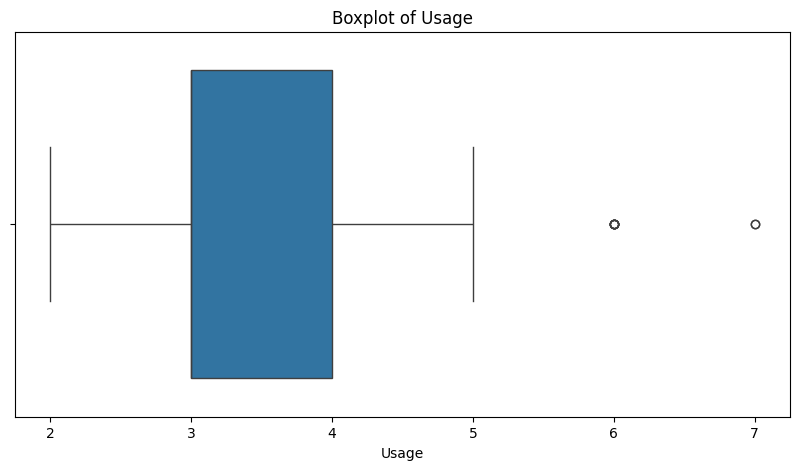

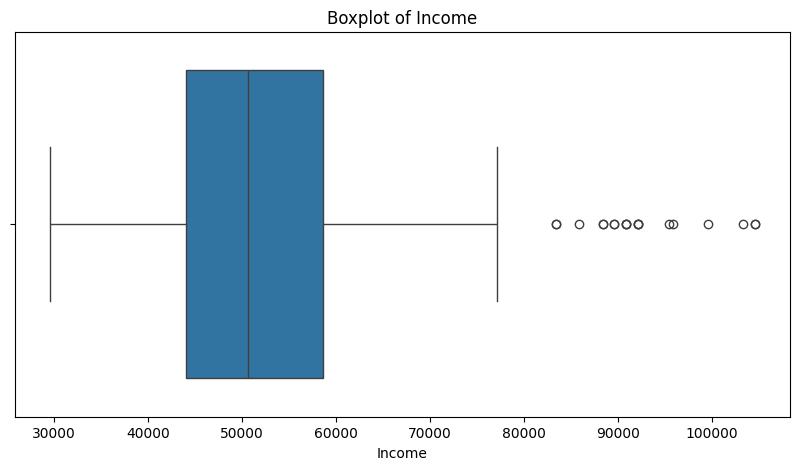

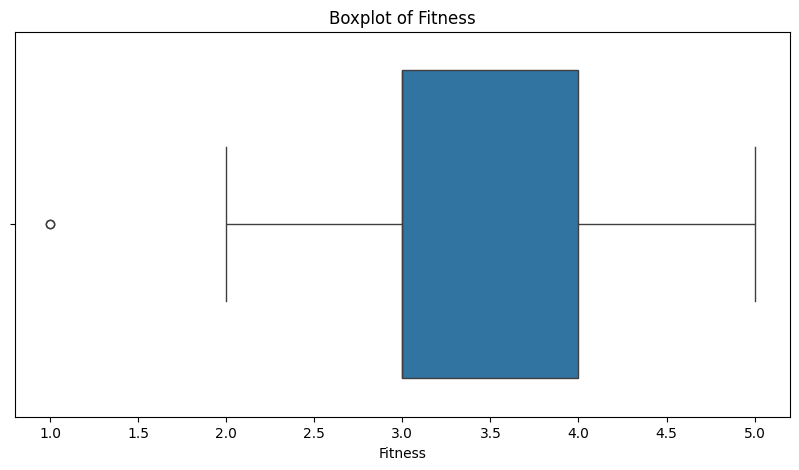

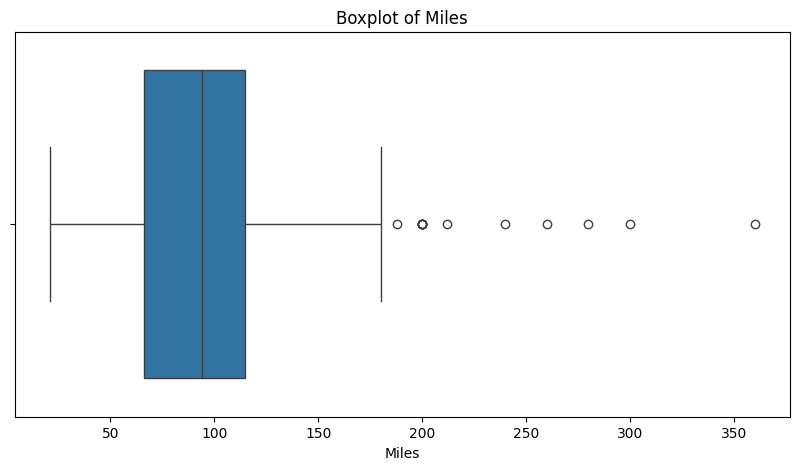

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

continuous_columns = ['Age', 'Usage', 'Income', 'Fitness', 'Miles']

# Plot boxplots for continuous variables
for col in continuous_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


b) Remove/clip the data between the 5 percentile and 95 percentile

In [9]:
# Clipping data between 5th and 95th percentile
for col in continuous_columns:
    df[col] = df[col].clip(lower=df[col].quantile(0.05), upper=df[col].quantile(0.95))


3. Check if features like marital status, Gender, and age have any effect on the product
purchased

   a) Find if there is any relationship between the categorical variables and the output variable in the data.

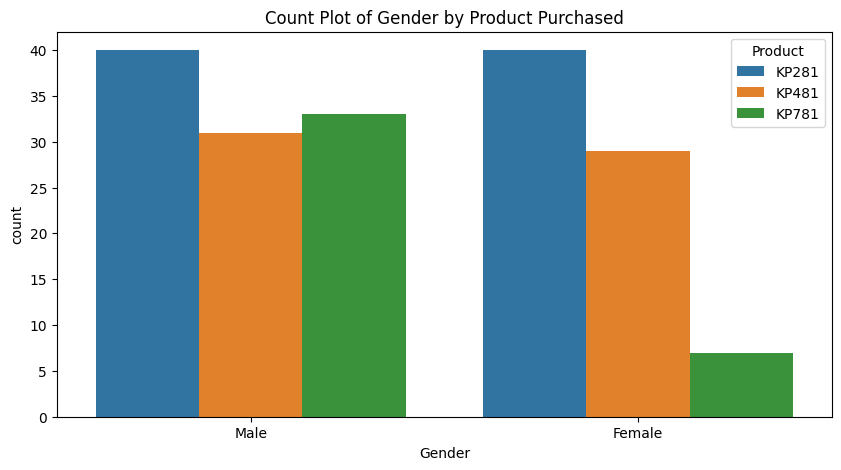

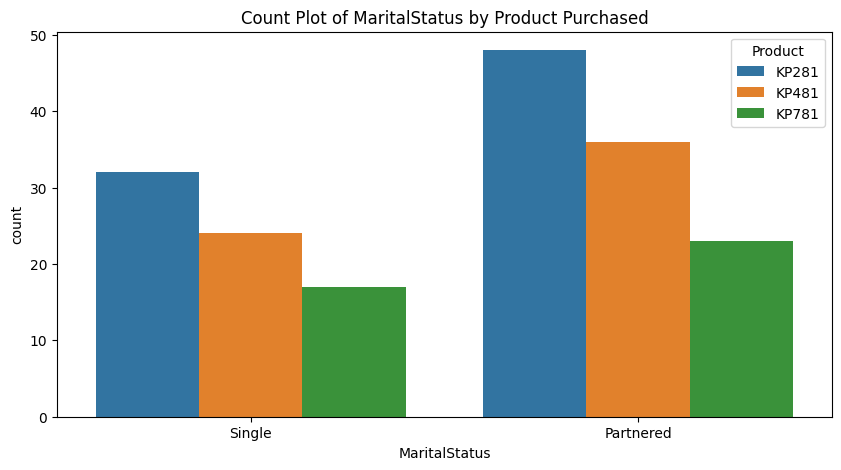

In [10]:
categorical_columns = ['Gender', 'MaritalStatus']

# Plot count plots for categorical variables
for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=df[col], hue=df['Product'])
    plt.title(f'Count Plot of {col} by Product Purchased')
    plt.show()


b) Find if there is any relationship between the continuous variables and the output
variable in the data.

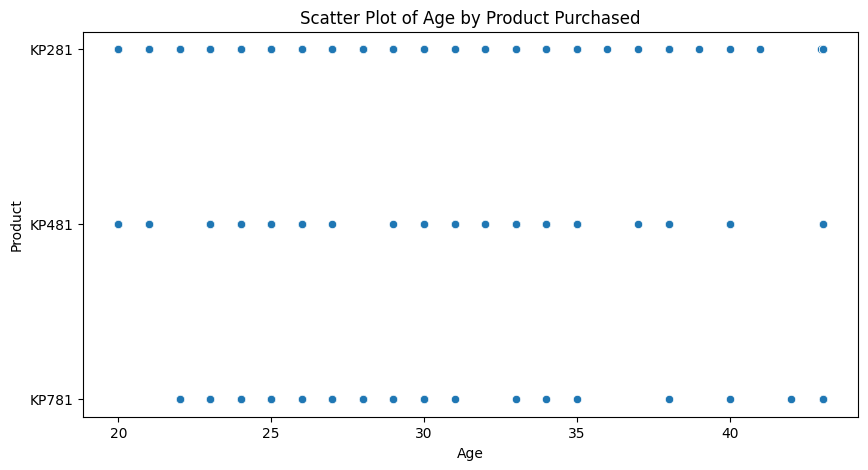

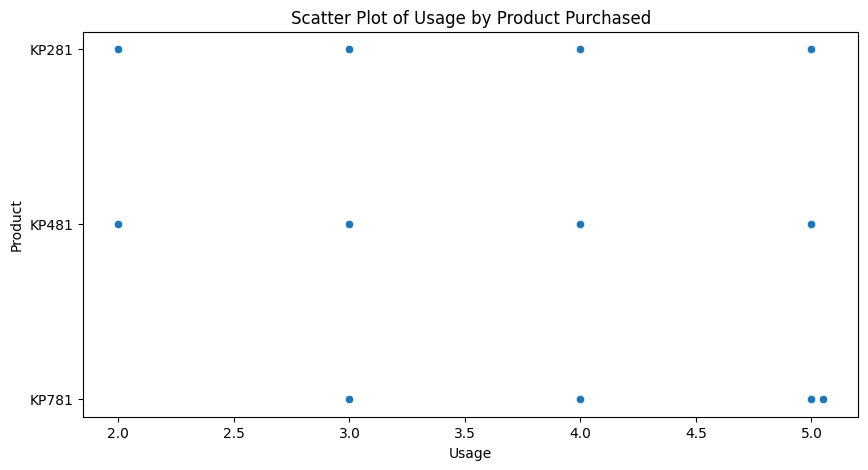

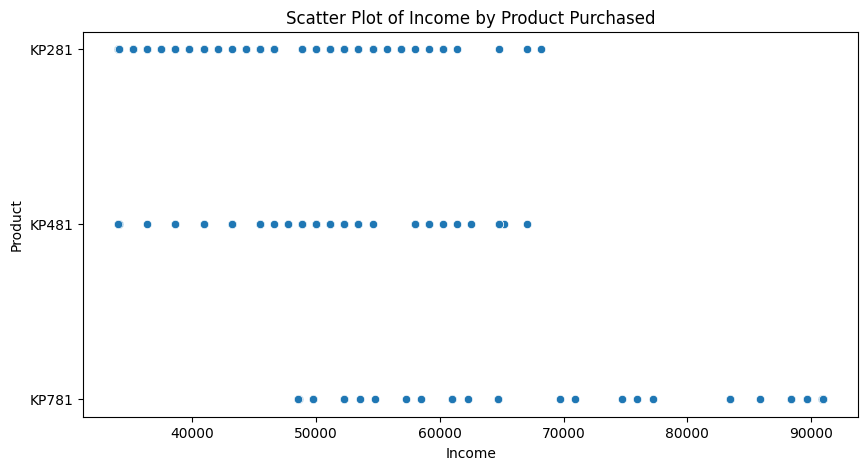

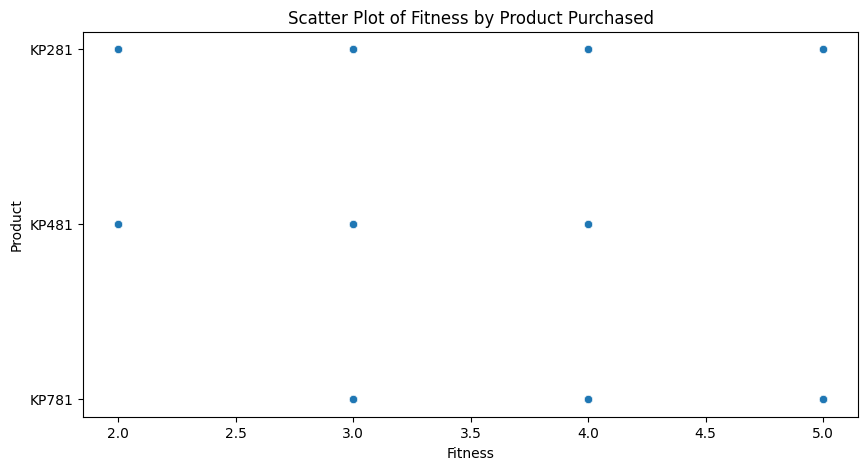

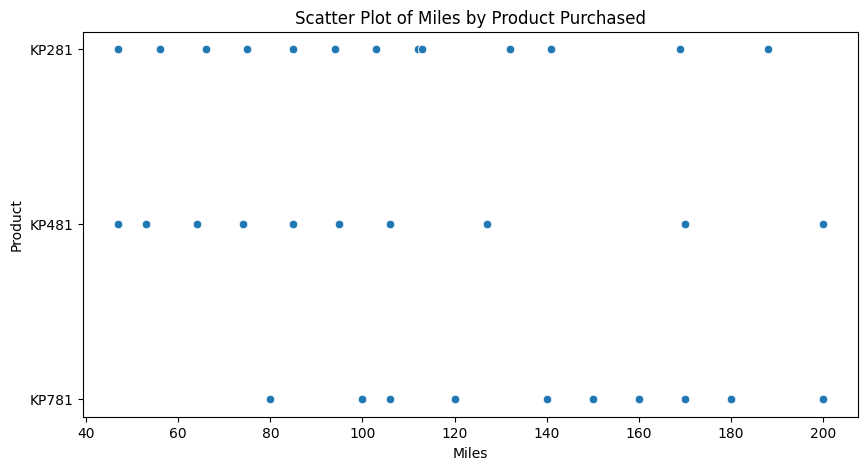

In [11]:
# Plot scatter plots for continuous variables
for col in continuous_columns:
    plt.figure(figsize=(10, 5))
    sns.scatterplot(x=df[col], y=df['Product'])
    plt.title(f'Scatter Plot of {col} by Product Purchased')
    plt.show()


4. Representing the Probability

 a) Find the marginal probability (what percent of customers have purchased
   KP281, KP481, or KP781)

In [12]:
# Calculate marginal probability for each product
product_prob = pd.crosstab(index=df['Product'], columns='Count', normalize='columns') * 100
print("Marginal Probability:\n", product_prob)


Marginal Probability:
 col_0        Count
Product           
KP281    44.444444
KP481    33.333333
KP781    22.222222


b)Find the probability that the customer buys a product based on each column.

In [13]:
# Calculate conditional probability
for col in categorical_columns + ['Product']:
    cond_prob = pd.crosstab(df[col], df['Product'], normalize='index')
    print(f"Conditional Probability for {col}:\n", cond_prob)


Conditional Probability for Gender:
 Product     KP281     KP481     KP781
Gender                               
Female   0.526316  0.381579  0.092105
Male     0.384615  0.298077  0.317308
Conditional Probability for MaritalStatus:
 Product           KP281     KP481     KP781
MaritalStatus                              
Partnered      0.448598  0.336449  0.214953
Single         0.438356  0.328767  0.232877
Conditional Probability for Product:
 Product  KP281  KP481  KP781
Product                     
KP281      1.0    0.0    0.0
KP481      0.0    1.0    0.0
KP781      0.0    0.0    1.0


c) Find the conditional probability that an event occurs given that another event has
occurred. (Example: given that a customer is female, what is the probability
she’ll purchase a KP481)

In [23]:


# Access the conditional probability for 'Female'
if 'Female' in cond_prob.index:
    female_prob = cond_prob.loc['Female']
    print("Probability of a Female customer buying KP481:", female_prob['KP481'])
else:
    print("Key 'Female' not found in cond_prob index")


Probability of a Female customer buying KP481: 0.3815789473684211


5. Check the correlation among different factors

 a) Find the correlation between the given features in the table.

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object
   Age  Education  Usage  Fitness  Income  Miles
0   18         14      3        4   29562    112
1   19         15      2        3   31836     75
2   19         14      4        3   30699     66
3   19         12      3        3   32973     85
4   20         13      4        2   35247     47


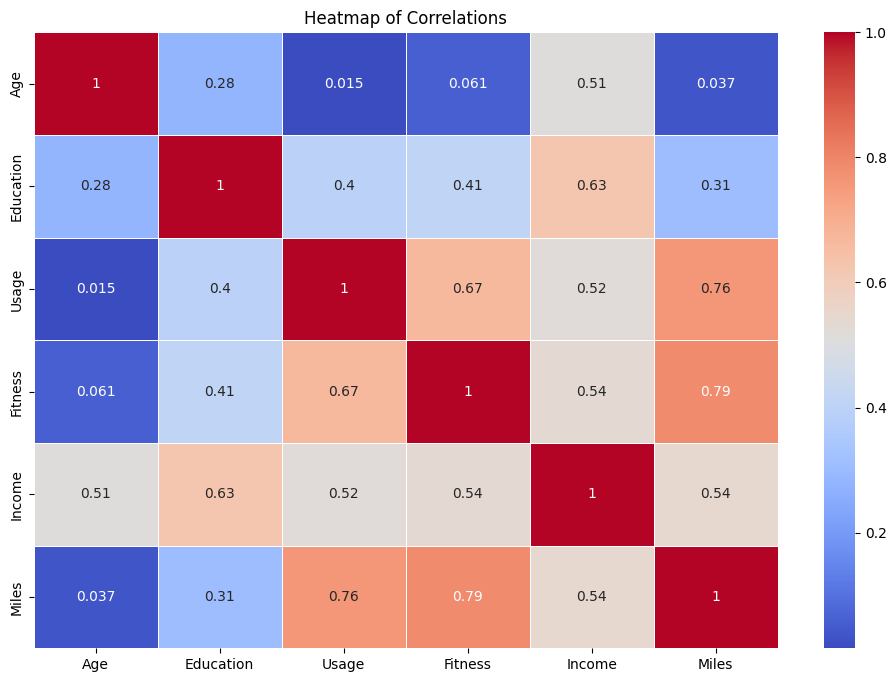

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/aerofit_treadmill.csv')

# Inspect the data types to identify non-numeric columns
print(df.dtypes)

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Check the selected numeric columns
print(numeric_df.head())

# Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_df.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Correlations')
plt.show()


6. Customer profiling and recommendation

 a)Make customer profilings for each and every product.
Hint: We want you to find at What age, gender, and income group but product
the KP281

In [26]:
# Profile customers by grouping by Product and summarizing key statistics
profiles = df.groupby('Product').agg({
    'Age': ['mean', 'std'],
    'Gender': lambda x: x.value_counts().idxmax(),
    'MaritalStatus': lambda x: x.value_counts().idxmax(),
    'Usage': ['mean', 'std'],
    'Income': ['mean', 'std'],
    'Fitness': ['mean', 'std'],
    'Miles': ['mean', 'std']
})
print("Customer Profiles:\n", profiles)


Customer Profiles:
            Age             Gender MaritalStatus     Usage            \
          mean       std <lambda>      <lambda>      mean       std   
Product                                                               
KP281    28.55  7.221452     Male     Partnered  3.087500  0.782624   
KP481    28.90  6.645248     Male     Partnered  3.066667  0.799717   
KP781    29.10  6.971738     Male     Partnered  4.775000  0.946993   

            Income               Fitness                 Miles             
              mean           std    mean       std        mean        std  
Product                                                                    
KP281    46418.025   9075.783190  2.9625  0.664540   82.787500  28.874102  
KP481    48973.650   8653.989388  2.9000  0.629770   87.933333  33.263135  
KP781    75441.575  18505.836720  4.6250  0.667467  166.900000  60.066544  


b) **Recommendations:**


**Targeted Marketing:**
  Focus marketing efforts on younger customers with higher income levels to increase the sales of KP781, leveraging their purchasing power and affinity for advanced fitness equipment.


**Promotional Campaigns**:
  Design promotional campaigns for KP281 aimed at attracting customers with moderate fitness levels who plan to use the treadmill moderately, emphasizing its affordability and suitability for their fitness goals.

**Product Positioning**:
  Position KP481 as the ideal treadmill for married individuals with stable income, highlighting its balanced features and reliability for consistent use.


**Improve Logistics:**
 Enhance logistics in states with longer delivery times to ensure timely delivery and improve overall customer satisfaction, thereby minimizing the impact of delivery delays.

**Customer Support:**
  Strengthen customer support during peak hours to provide faster and more effective assistance, improving customer experience and reducing the likelihood of customer churn.
